In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [31]:
metric_list = ['N_max','epi','r_s','open_ratio']
# metric_list = ['E','gamma','adptwalk_steps','adptwalk_probs']
# ruggedness_measure_dict = {'N_max':'$\mathit{N}_{max}$','epi':'$\mathit{F}_{rse}$','r_s':'$\mathit{r/s}$','open_ratio':'$\mathit{F}_{bp}$'}
ruggedness_measure_dict = {'N_max':'$\mathit{N}_{max}$','epi':'$\mathit{F}_{rse}$',
                           'r_s':'$\mathit{r/s}$','open_ratio':'$\mathit{F}_{bp}$',
                           'E':'$\mathit{E}$','gamma':'($1-\mathit{\gamma}$)',
                           'adptwalk_steps':'$1/\mathit{N}_{adapt}$',
                           'adptwalk_probs':'($1-\mathit{P}_{adapt}$)'}

plot_dict = {j:{i:[] for i in metric_list} for j in ['NK','RMF','Polynomial']}
N = 10  # Defalut lanscape size is N = 10.

In [32]:
for model in ['NK','RMF','Polynomial']:
    for metric in metric_list:
        with open(f'plot_data/plot_df_{model}{N}_{metric}.pkl','rb') as f:
            plot_dict[model][metric] = pickle.load(f)

In [33]:
error_list = [0.002,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,
              0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.35,0.4,0.5,0.6]

In [34]:
for model in ['NK','RMF','Polynomial']:
    for metric in metric_list:
        with open(f'plot_data/plot_df_{model}{N}_{metric}.pkl','rb') as f:
            plot_dict[model][metric] = pickle.load(f)

In [35]:
# Plot layout control
text_y = [48,42,25]
ylim_dict = {'open_ratio':[0.45,1],'N_max':[0,100],'epi':[0,0.2],'r_s':[0,30],
            'E':[0,1], 'gamma':[0,1], 'adptwalk_steps':[0.1,0.7], 'adptwalk_probs':[0,1]
            }

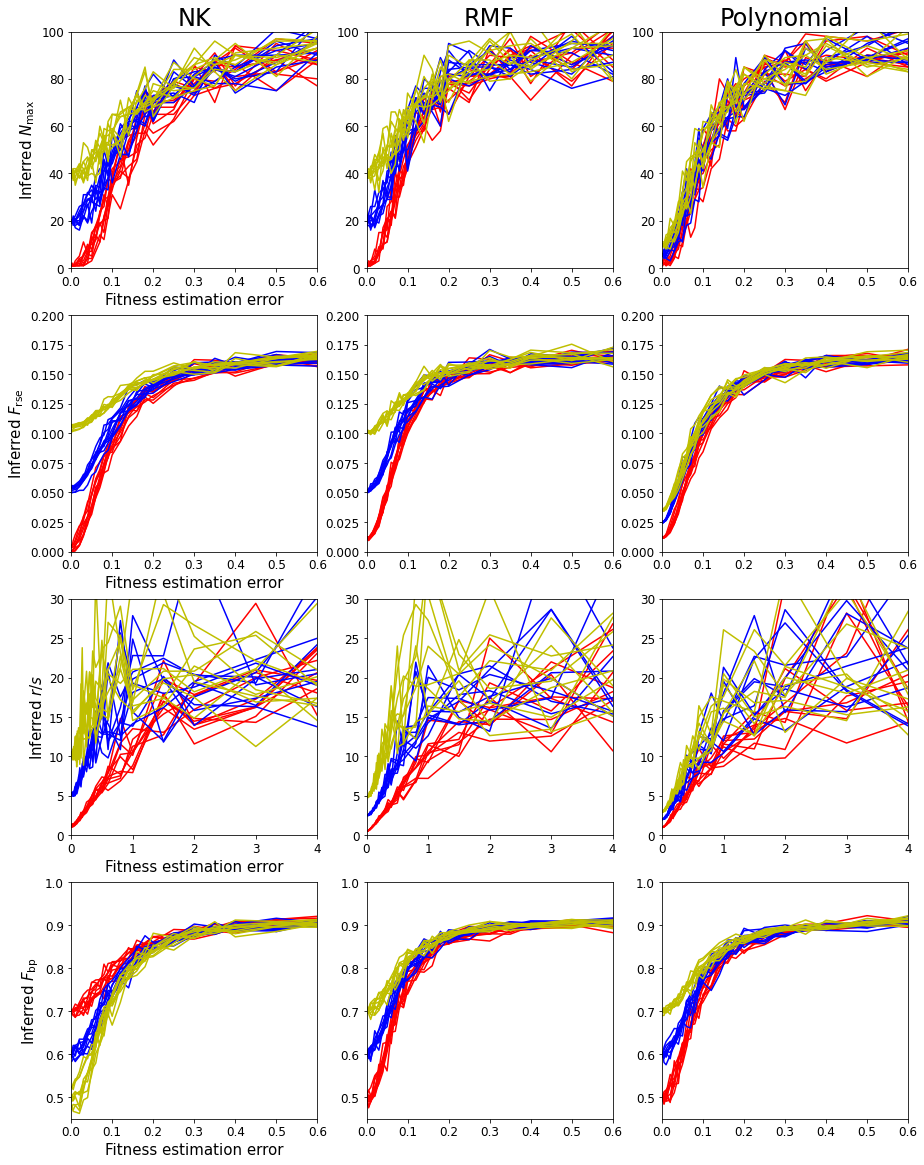

In [36]:
fig,axs = plt.subplots(4,3,figsize=[15,20])
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

for row,metric in enumerate(metric_list):
    if metric == 'r_s':
        error_list = [0.002,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,
                      0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.35,0.4,0.5,0.6,0.8,1,1.5,2,3,4]
    else:
        error_list = [0.002,0.005,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,
                      0.1,0.12,0.14,0.16,0.18,0.2,0.25,0.3,0.35,0.4,0.5,0.6]
    for column,model in enumerate(['NK','RMF','Polynomial']):
        ax = axs[row][column]
        ax.tick_params(labelsize=12)
        window_width=5
        N_error = len(error_list)
        if metric in ['open_ratio','gamma','adptwalk_probs']:
            y_data = 1 - plot_dict[model][metric][f'{metric}_E']
        elif metric == 'adptwalk_steps':
            y_data = 1/plot_dict[model][metric][f'{metric}_E']
        else: y_data = plot_dict[model][metric][f'{metric}_E']
        
        for n in range(10):
            ax.plot(error_list,y_data[n*len(error_list):(n+1)*len(error_list)],label=None,c='r')
        for n in range(10,20):
            ax.plot(error_list,y_data[n*len(error_list):(n+1)*len(error_list)],label=None,c='b')
        for n in range(20,30):
            ax.plot(error_list,y_data[n*len(error_list):(n+1)*len(error_list)],label=None,c='y')
        if row == 0:
            ax.set_title(model,fontsize=24)
        if column == 0:
            ax.set_ylabel(f'Inferred {ruggedness_measure_dict[metric]}',fontsize=15)
            ax.set_xlabel('Fitness estimation error',fontsize=15)
        if metric == 'r_s':
            ax.set_xlim([0,4])
        else:
            ax.set_xlim([0,0.6])
        ax.set_ylim(ylim_dict[metric])
        

plt.show()
